# Liner Regression with Cross Validation

In [22]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Import the data file

In [23]:
df = pd.read_csv("Z:/ADS/ass3/Demo/data_final_final.csv",header=0)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,annual_inc,issue_month,issue_year,dti,...,loan_status_Does_not_meet_the_credit_policy_Status_Charged_Off,loan_status_Does_not_meet_the_credit_policy_Status_Fully_Paid,loan_status_Fully_Paid,loan_status_In_Grace_Period,loan_status_Issued,loan_status_Late_16_30_days,loan_status_Late_31_120_days,pymnt_plan_y,initial_list_status_w,int_rate
0,0.119293,0.119293,0.118696,0.000859,0.003886,0.000239,0.572605,0.000286,0.047980,0.000660,...,0,0,1,0,0,0,0,0,0,10.65
1,0.067323,0.067323,0.067323,0.001616,0.001611,0.000000,0.807871,0.000323,0.054154,0.000027,...,0,0,0,0,0,0,0,0,0,15.27
2,0.152472,0.152472,0.152472,0.002287,0.005357,0.000635,0.778372,0.000762,0.127759,0.000554,...,0,0,1,0,0,0,0,0,0,15.96
3,0.155753,0.155753,0.155753,0.000561,0.005285,0.000156,0.766305,0.000187,0.031322,0.000312,...,0,0,1,0,0,0,0,0,0,13.49
4,0.032231,0.032231,0.032231,0.000645,0.000728,0.000011,0.859494,0.000129,0.021606,0.000193,...,0,0,0,0,0,0,0,0,0,12.69
5,0.099349,0.099349,0.099349,0.000715,0.003109,0.000060,0.715312,0.000238,0.039958,0.000223,...,0,0,1,0,0,0,0,0,0,7.90
6,0.106246,0.106246,0.106246,0.000911,0.002581,0.000121,0.713430,0.000182,0.030523,0.000357,...,0,0,0,0,0,0,0,0,0,15.96
7,0.052606,0.052606,0.052606,0.000631,0.001919,0.000158,0.841692,0.000210,0.035263,0.000094,...,0,0,1,0,0,0,0,0,0,18.64
8,0.111898,0.111898,0.111898,0.001199,0.003045,0.000080,0.799273,0.000240,0.040183,0.000111,...,0,0,0,0,0,0,0,0,0,21.28
9,0.161685,0.161685,0.160933,0.001805,0.003653,0.000000,0.451215,0.000361,0.060493,0.000544,...,0,0,0,0,0,0,0,0,0,12.69


In [24]:
#select the dependent(X) and independent variable (y)
X = df[['grade_C','grade_D','grade_E',
        'grade_F','grade_G','total_rec_int',
        'total_pymnt_inv','funded_amnt_inv','sub_grade_B5',
        'sub_grade_C5','sub_grade_C4','sub_grade_B4','sub_grade_D5','sub_grade_C3']].values

y = df[['int_rate']].values

In [25]:
#split the data in train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [26]:
#train the linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
#predict the interest rate
predictions = lm.predict(X_test)
predictionx = lm.predict(X_train)

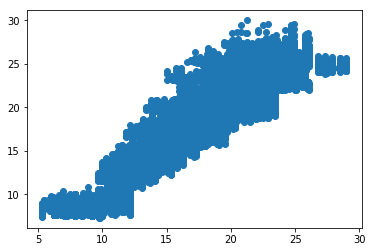

In [28]:
#plot the graph for relation ,on x-axis in is actuall interest rate and on the y axis there is predected interested rate
plt.scatter(y_test,predictions)

In [29]:
#calculate the r-square score
from sklearn.metrics import *
r2_score(y_test,predictions)

0.9197981212331484

In [30]:
# Calculate the absolute errors 
errors = abs(predictions - y_test) 
# Print out the mean absolute error (mae) 
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.92 degrees.


In [31]:
# Calculate mean absolute percentage error (MAPE) 
mape = 100 * (errors / y_test) 
#print('MAPE:',mape)
# Calculate and display accuracy 
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.45 %.


In [32]:
test_int = y_test.tolist()

In [33]:
train_int = y_train.tolist()

In [35]:
#calculate mape
mape = np.mean(np.abs((test_int-predictions) / test_int)) * 100
print('MAPE of test data:',mape)
mape1 = np.mean(np.abs((train_int-predictionx) / train_int)) * 100
print('MAPE of train data:',mape1)

MAPE of test data: 8.546465323281756
MAPE of train data: 8.557711075289202


# We will map the residual against the predicted value ---the output is random and close to 0 

Text(0, 0.5, 'residuals')

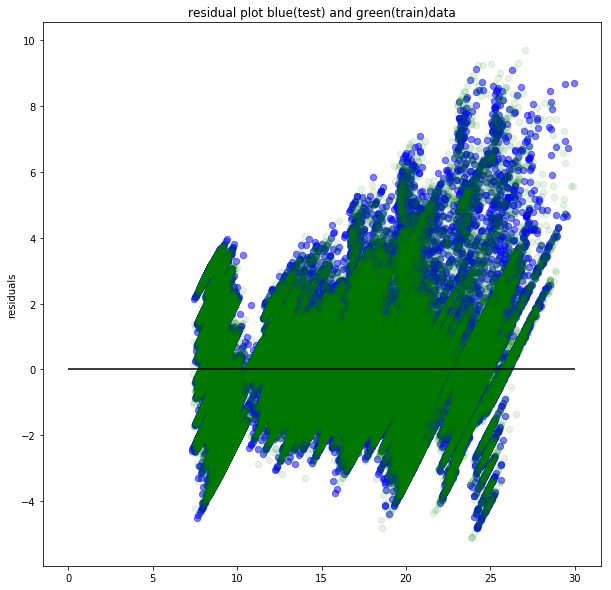

In [36]:
#plot the graph on x-axis there is predicted interest rate and on y-axis there is residual which means difference,
#the green colour are train data and blue is test data
plt.figure(figsize = (10,10))
plt.scatter(lm.predict(X_test),lm.predict(X_test) - test_int,c='b',s=40,alpha=0.5)
plt.scatter(lm.predict(X_train),lm.predict(X_train) - train_int,c='g',s=40,alpha=0.1)
plt.hlines(y=0,xmin=0,xmax=30)
plt.title('residual plot blue(test) and green(train)data')
plt.ylabel('residuals')

In [37]:
#calculte mape after 5 fold CV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from math import fabs
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cvscores =[]
kf = KFold(n_splits=5, random_state=42, shuffle=True)
i=1
model = LinearRegression()

for train_index, test_index in kf.split(X):
    X_trainD, X_testD = X[train_index], X[test_index]
    y_trainD, y_testD = y[train_index], y[test_index]
    i=i+(int(len(X_train)/5))
    model = LinearRegression()
    model.fit(X_trainD, y_trainD)
    pred= model.predict(X_testD)
    mape=np.mean(np.abs((y_testD-pred) / y_testD)) * 100
    cvscores.append(mape)
mape=np.mean(cvscores)
print('MAPE after 5 fold cross validation :')
print(mape)


MAPE after 5 fold cross validation :
8.556381496160089


After 5 fold cross validation the MAPE value changed by 0.01